# Figure S5A

In [1]:
library(ggplot2)
library(dplyr)
library(gground)
library(ggprism)
library(tidyverse)


载入程辑包：‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


载入需要的程辑包：grid

载入需要的程辑包：rlang

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ lubridate 1.9.4     ✔ tibble    3.2.1
✔ purrr     1.0.4     ✔ tidyr     1.3.1
✔ readr     2.1.5     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ purrr::%@%()         masks rlang::%@%()
✖ dplyr::filter()      masks stats::filter()
✖ purrr::flatten()     masks rlang::flatten()
✖ purrr::flatten_chr() masks rlang::flatten_chr()
✖ purrr::flatten_dbl() masks rlang::flatten_dbl()
✖ purrr::flatten_int() masks rlang::flatten_int()
✖ purrr::flatten_lgl() masks rlang::flatten_lgl()
✖ purrr::flatten_raw() masks rlang::flatten_raw()
✖ purrr::invoke()      masks rlang::invoke()
✖ dplyr::lag()         masks stats::lag()
✖ purr

In [2]:
GO <- read.delim("cancer_clu_decontx_GO_enrichment.tsv",sep = " ")
head(GO)
KEGG <- read.delim("cancer_clu_decontx_kegg_enrichment.tsv",sep = " ")
head(KEGG)

,ONTOLOGY,ID,Description,GeneRatio,BgRatio,pvalue,p.adjust,qvalue,geneID,Count,termRatio
,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<int>,<dbl>
1,BP,GO:0001944,vasculature development,32/192,389/9681,4.863093e-12,1.320816e-08,1.159976e-08,CLDN5/NPR1/CCN3/SEMA6A/CLEC14A/ECM1/BMP2/EPAS1/SPRY2/EGFL7/DLL1/STAB1/ADM2/CEMIP2/FLT1/COL5A1/CCN2/NOTCH4/PDE2A/JMJD6/TIPARP/ZFAND5/FBXW7/PLXND1/AGO2/NR4A1/PDE3B/ALOX5/SERPINE1/ACKR3/KLF2/LRP5,32,0.08226221
2,BP,GO:0051093,negative regulation of developmental process,31/192,467/9681,2.384020e-09,1.079166e-06,9.477525e-07,CLDN5/NPR1/SOCS2/CCN3/SEMA6A/CDKN1A/SAP30/ECM1/SPRY1/BMP2/SPRY2/DLL1/STAB1/COL5A1/NOTCH4/SOCS5/TOB1/KLF7/FERMT2/SMARCA2/CRIM1/FBXW7/ID2/PDE3B/TSC22D1/LDLRAD4/ALOX5/SERPINE1/LGMN/KLF2/LRP5,31,0.06638116
3,BP,GO:0007169,transmembrane receptor protein tyrosine kinase signaling pathway,24/192,361/9681,1.789490e-07,5.400283e-05,4.742672e-05,SOCS2/SEMA6A/CLEC14A/SPRY1/BMP2/SPRY2/DLL1/FLT1/HBEGF/CCN2/IRS2/SOCS5/EFNB1/FLT3/DDIT4/ARHGEF7/GRB10/INSR/TIPARP/ZFAND5/CRIM1/PTPRE/FGFR1/LGMN,24,0.06648199
4,BP,GO:0071900,regulation of protein serine/threonine kinase activity,15/192,181/9681,2.890682e-06,5.234061e-04,4.596691e-04,CDKN1A/SPRY1/BMP2/SPRY2/CCNE2/CEMIP/FLT1/CD24/LATS2/FERMT2/FLT3/INSR/FGFR1/PRKAR2B/LRP5,15,0.08287293
5,BP,GO:0030855,epithelial cell differentiation,19/192,296/9681,6.219833e-06,9.962994e-04,8.749766e-04,CLDN5/CNN3/CDKN1A/SPRY1/BMP2/EPAS1/SPRY2/DLL1/CD24/NOTCH4/PDE2A/LATS2/EZR/KLF7/NPY/ID2/SERPINE1/KLF2/ZNF703,19,0.06418919
6,BP,GO:0030856,regulation of epithelial cell differentiation,9/192,67/9681,6.236042e-06,9.962994e-04,8.749766e-04,CLDN5/SPRY1/BMP2/SPRY2/DLL1/CD24/NOTCH4/KLF7/SERPINE1,9,0.13432836


,category,subcategory,ID,Description,GeneRatio,BgRatio,pvalue,p.adjust,qvalue,geneID,Count,termRatio,gene
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<int>,<dbl>,<chr>
1,Human Diseases,Cancer: overview,hsa05202,Transcriptional misregulation in cancer,11/122,118/4724,0.0002002059,0.04064179,0.03793374,IL1B/CTSS/NFKB1/CLEC7A/FCER1G/IRAK2/FCGR2A/CD14/FCGR1A/ITGAX,11,0.09322034,IL1B/CTSS/NFKB1/CLEC7A/FCER1G/IRAK2/FCGR2A/CD14/FCGR1A/ITGAX


In [3]:
use_pathway <- group_by(GO, ONTOLOGY) %>%
  top_n(10, wt = -p.adjust) %>%
  group_by(p.adjust) %>%
  rbind(
    top_n(KEGG,20, -p.adjust) %>%
      group_by(p.adjust) %>%
      mutate(ONTOLOGY ='KEGG')
  ) %>%
  ungroup() %>%
  mutate(ONTOLOGY = factor(ONTOLOGY,
                           levels = rev(c('BP','CC','MF','KEGG')))) %>%
  dplyr::arrange(ONTOLOGY, p.adjust) %>%
  mutate(Description = factor(Description, levels = Description)) %>%
  tibble::rowid_to_column('index')
head(use_pathway)

index,ONTOLOGY,ID,Description,GeneRatio,BgRatio,pvalue,p.adjust,qvalue,geneID,Count,termRatio,category,subcategory,gene
<int>,<fct>,<chr>,<fct>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<int>,<dbl>,<chr>,<chr>,<chr>
1,KEGG,hsa05202,Transcriptional misregulation in cancer,11/122,118/4724,2.002059e-04,4.064179e-02,3.793374e-02,IL1B/CTSS/NFKB1/CLEC7A/FCER1G/IRAK2/FCGR2A/CD14/FCGR1A/ITGAX,11,0.09322034,Human Diseases,Cancer: overview,IL1B/CTSS/NFKB1/CLEC7A/FCER1G/IRAK2/FCGR2A/CD14/FCGR1A/ITGAX
2,MF,GO:0038023,signaling receptor activity,30/202,439/9916,4.470987e-09,9.523203e-07,8.494876e-07,NPR1/P2RY14/PTH1R/TNFRSF18/FLT1/NOTCH4/TNFRSF10D/JMJD6/SLC1A5/FLT3/LMBR1/CLEC4E/INSR/OGFRL1/NPY/CRIM1/F2RL3/FFAR1/P2RX5/PLXND1/PTPRE/FGFR1/GPR132/NR4A1/MRC1/IL13RA1/ACKR3/IL3RA/GPRC5C/LRP5,30,0.06833713,NA,NA,NA
3,MF,GO:0060089,molecular transducer activity,30/202,439/9916,4.470987e-09,9.523203e-07,8.494876e-07,NPR1/P2RY14/PTH1R/TNFRSF18/FLT1/NOTCH4/TNFRSF10D/JMJD6/SLC1A5/FLT3/LMBR1/CLEC4E/INSR/OGFRL1/NPY/CRIM1/F2RL3/FFAR1/P2RX5/PLXND1/PTPRE/FGFR1/GPR132/NR4A1/MRC1/IL13RA1/ACKR3/IL3RA/GPRC5C/LRP5,30,0.06833713,NA,NA,NA
4,MF,GO:0004714,transmembrane receptor protein tyrosine kinase activity,5/202,28/9916,2.239911e-04,1.921613e-02,1.714114e-02,FLT1/FLT3/INSR/CRIM1/FGFR1,5,0.17857143,NA,NA,NA
5,MF,GO:0019838,growth factor binding,7/202,65/9916,3.358956e-04,1.995579e-02,1.780094e-02,FLT1/COL5A1/CCN2/FLT3/S100A13/INSR/FGFR1,7,0.10769231,NA,NA,NA
6,MF,GO:0038024,cargo receptor activity,5/202,31/9916,3.685060e-04,1.995579e-02,1.780094e-02,STAB1/INSR/MRC1/ACKR3/MSR1,5,0.16129032,NA,NA,NA


Warning message in geom_segment(aes(x = 0, y = 0, xend = xaxis_max, yend = 0), linewidth = 1.5, :
“All aesthetics have length 1, but the data has 20 rows.
ℹ Please consider using `annotate()` or provide this layer with data containing
  a single row.”


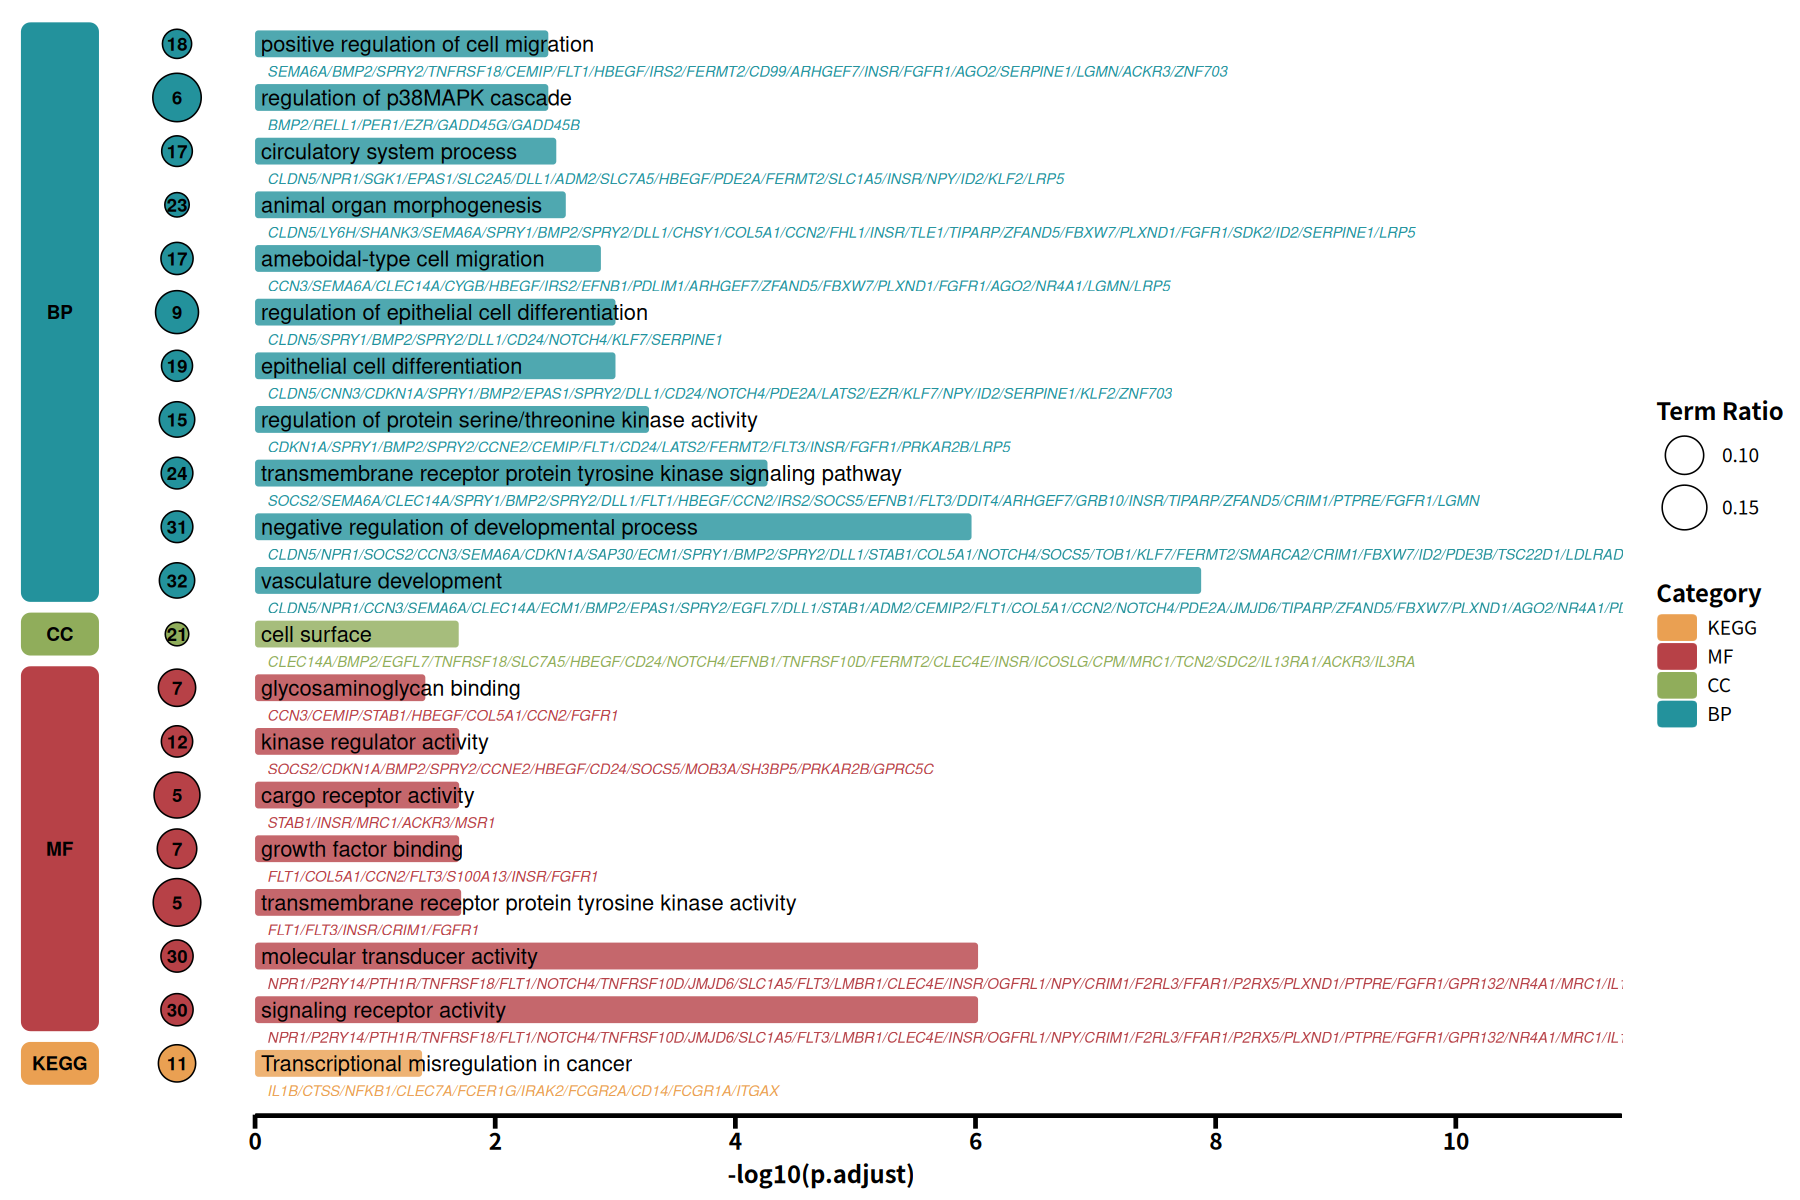

In [4]:
options(repr.plot.width=15, repr.plot.height=10)

pal <- c('#eaa052', '#b74147','#90ad5b','#23929c')

width <-0.65
xaxis_max <- max(-log10(use_pathway$p.adjust)) +3.5
rect.data <- group_by(use_pathway, ONTOLOGY) %>%
  summarize(n = n()) %>%
  ungroup() %>%
  mutate(
    xmin = -3* width,
    xmax = -2* width,
    ymax = cumsum(n),
    ymin = lag(ymax, default =0) +0.6,
    ymax = ymax +0.4
  )
p <- use_pathway %>%
  ggplot(aes(-log10(p.adjust), y = index, fill = ONTOLOGY))+
  geom_round_col(
    aes(y = Description), width =0.5, alpha =0.8
  ) +
  geom_text(
    aes(x =0.05, label = Description),
    hjust =0, size =4.5
  ) +
  geom_text(
    aes(x =0.1, label = geneID, colour = ONTOLOGY),
    hjust =0, vjust =3, size =3, fontface ='italic',
    show.legend =FALSE
  ) +
  geom_point(
    aes(x = -width, size = termRatio),
    shape =21
  ) +
  geom_text(
    aes(x = -width, label = Count ),size = 3.8,fontface ='bold',
  ) +
  scale_size_continuous(name ='Term Ratio', range = c(6,13)) +
  geom_round_rect(
    aes(xmin = xmin, xmax = xmax, ymin = ymin, ymax = ymax,
        fill = ONTOLOGY),
    data = rect.data,
    radius = unit(2,'mm'),
    inherit.aes =FALSE
  ) +
  geom_text(
    aes(x = (xmin + xmax) /2, y = (ymin + ymax) /2, label = ONTOLOGY),fontface ='bold',
    data = rect.data,
    inherit.aes =FALSE
  ) +
  geom_segment(
    aes(x =0, y =0, xend = xaxis_max, yend =0),
    linewidth =1.5,
    inherit.aes =FALSE
  ) +
  labs(y =NULL) +
  scale_fill_manual(name ='Category', values = pal) +
  scale_colour_manual(values = pal) +
  scale_x_continuous(
    breaks = seq(0, xaxis_max,2),
    expand = expansion(c(0,0))
  ) +
  theme_prism() +
  theme(
    axis.text.y = element_blank(),
    axis.line = element_blank(),
    axis.ticks.y = element_blank(),
    legend.title = element_text()
  )
p
ggsave("enrichment_of_cancer_cell_cluster.pdf",width = 15,height = 10,units = "in",dpi = 300)

# Figure S5B

In [5]:
library(Seurat)
library(ggplot2)

载入需要的程辑包：SeuratObject

载入需要的程辑包：sp


载入程辑包：‘SeuratObject’


The following objects are masked from ‘package:base’:

    intersect, t




In [6]:
PBMC <- readRDS("PBMC.Rds")
PBMC
head(PBMC@meta.data)

An object of class Seurat 
70716 features across 19455 samples within 2 assays 
Active assay: RNA (35358 features, 2000 variable features)
 3 layers present: counts, data, scale.data
 1 other assay present: orig.count
 3 dimensional reductions calculated: pca, tsne, umap

,orig.ident,nCount_RNA,nFeature_RNA,CellBarcodes,Cellnames,nCount_HTO,nFeature_HTO,nCount_pseudoHTO,nFeature_pseudoHTO,HTO_maxID,⋯,RNA_snn_res.1.8,RNA_snn_res.1.9,RNA_snn_res.2,decount_score,old_anno,anno,anno_new,totalCNV,nCount_orig.count,nFeature_orig.count
,<fct>,<dbl>,<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<int>,<chr>,⋯,<fct>,<fct>,<fct>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<int>
CELL4_N1,lib17-chip3,2000,1054,AACAGACGACCCTCAGGTCG,CELL4_N1,36,2,39,3,Case1,⋯,17,17,18,0.06307971,Mature NK T cell,CD8+ cytotoxic T cell,Case1,704,2042,1062
CELL5_N1,lib17-chip3,1148,729,AACAGACGACCGCACAGGTA,CELL5_N1,12,2,15,3,Case1,⋯,0,3,0,0.09396679,NA,Natural killer cell,Case1,1050,1185,740
CELL7_N1,lib17-chip3,2045,1049,AACAGCATAGCCTGTTGCGC,CELL7_N1,40,2,43,3,Case1,⋯,4,5,2,0.03652518,CD14+ monocyte,CD14+ monocyte,Case1,848,2064,1054
CELL8_N1,lib17-chip3,4861,2196,AACCTAGTAGATATGTCTCA,CELL8_N1,33,2,36,3,Case2,⋯,7,7,8,0.02897729,Pro-B cell,Transitional B cell,Transitional B cell,956,4900,2205
CELL9_N1,lib17-chip3,1170,728,AACCTAGTAGCACAGAAGCC,CELL9_N1,26,3,29,3,Case1,⋯,0,3,0,0.05322462,Natural killer cell,Natural killer cell,Case1,1405,1186,735
CELL10_N1,lib17-chip3,14622,3908,AACCTGGTGAAACATTCCTC,CELL10_N1,40,3,43,3,Case3,⋯,28,28,29,0.07923297,Plasma cell,Plasma cell,Plasma cell,300,15381,3961


Warning message:
“The `slot` argument of `FetchData()` is deprecated as of SeuratObject 5.0.0.
ℹ Please use the `layer` argument instead.
ℹ The deprecated feature was likely used in the Seurat package.
  Please report the issue at <https://github.com/satijalab/seurat/issues>.”
Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”
Scale for x is already present.
Adding another scale for x, which will replace the existing scale.
Scale for x is already present.
Adding another scale for x, which will replace the existing scale.
Scale for x is already present.
Adding another scale for x, which will replace the existing scale.
Scale for y is already present.
Adding another scale for y, which will replace the existing scale.
Scale for y is already present.
Adding another scale for y, which will replace the existing scale.
Scale for y is already present.
Adding another scale for y, which will replace the existing scale.
Scale for

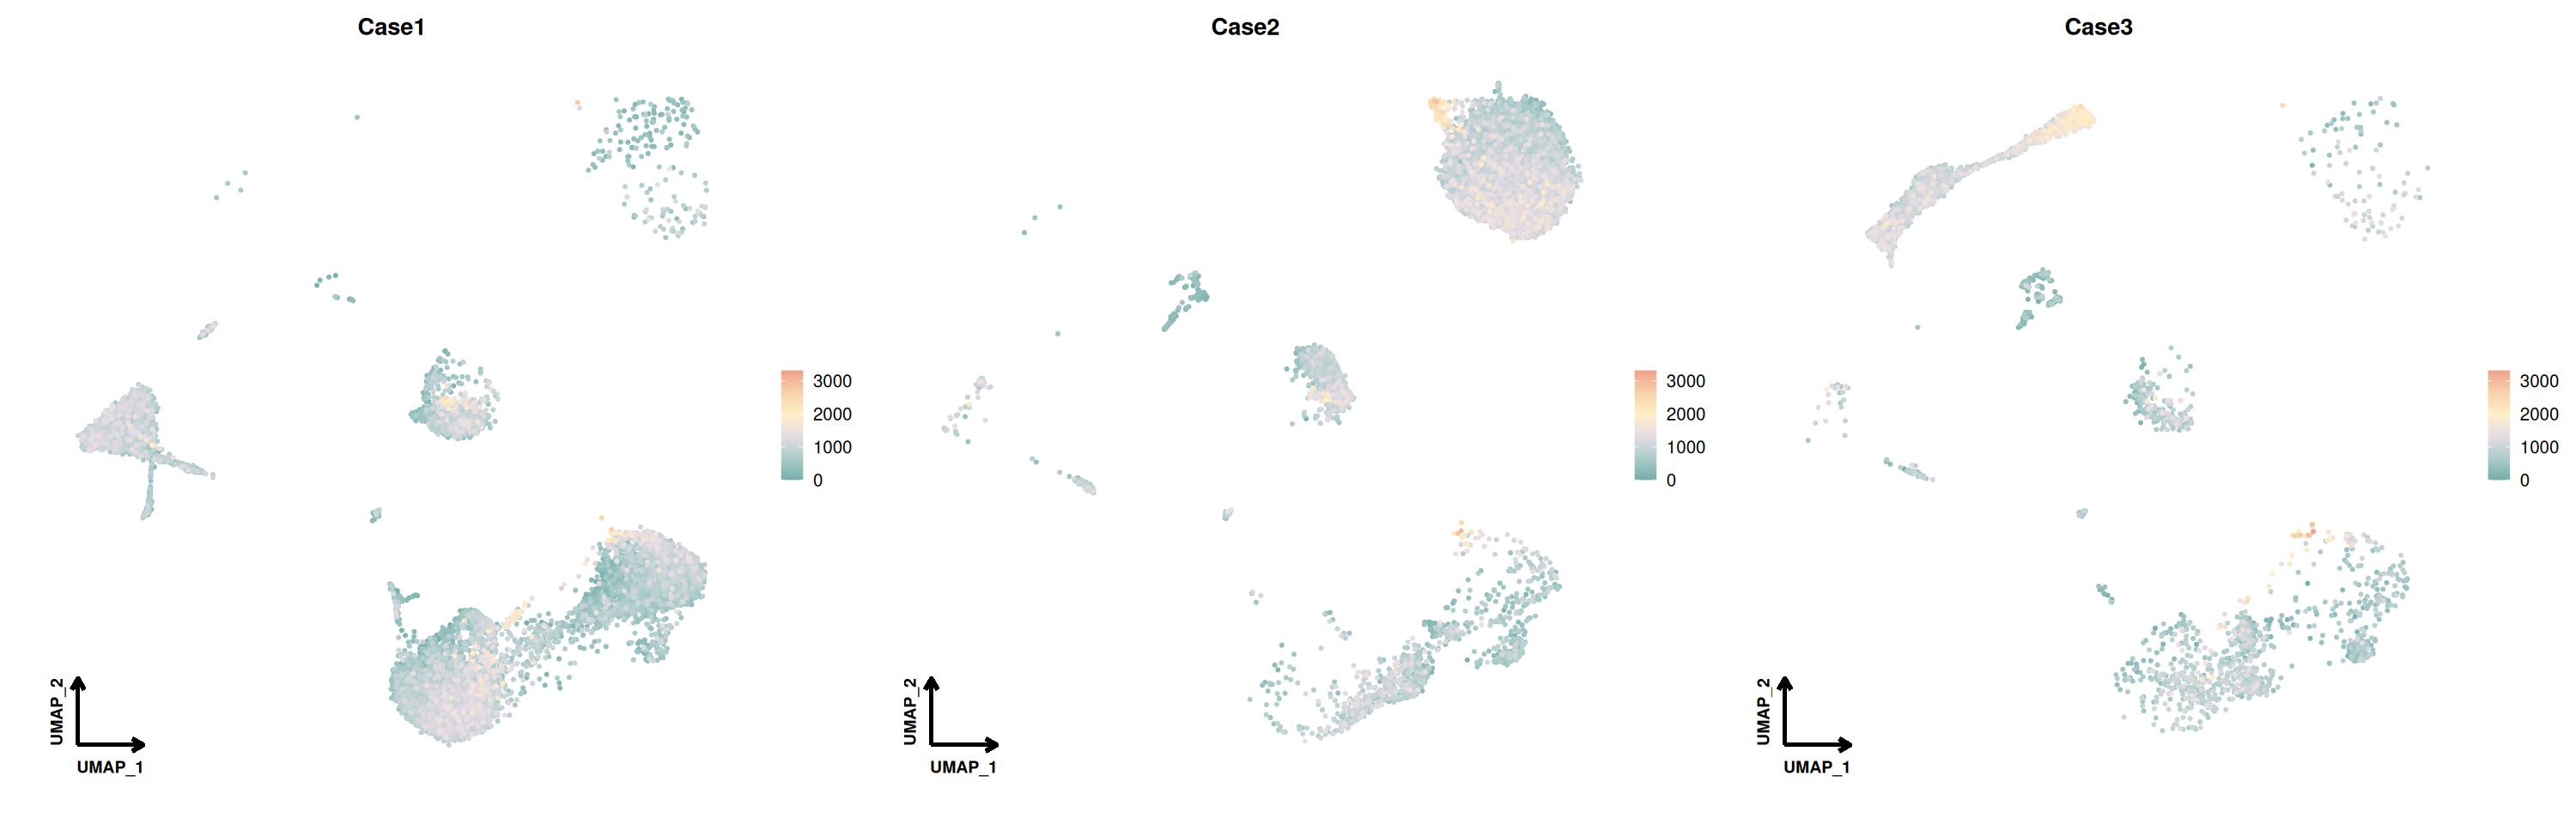

In [7]:
options(repr.plot.width=25, repr.plot.height=8)

ext_len1 <- (max(PBMC@reductions$umap@cell.embeddings[,1])-min(PBMC@reductions$umap@cell.embeddings[,1]))/10
ext_len2 <- (max(PBMC@reductions$umap@cell.embeddings[,2])-min(PBMC@reductions$umap@cell.embeddings[,2]))/10
FeaturePlot(PBMC,split.by="HTO_classification",features = "totalCNV",order = T,pt.size = 0.5) & 
  theme(axis.line = element_blank(),axis.ticks = element_blank(),axis.text = element_blank(),axis.title = element_blank(),legend.position = "right")&
  geom_segment(aes(x = min(PBMC@reductions$umap@cell.embeddings[,1]) , y = min(PBMC@reductions$umap@cell.embeddings[,2]) ,
                   xend = min(PBMC@reductions$umap@cell.embeddings[,1]) +ext_len1, yend = min(PBMC@reductions$umap@cell.embeddings[,2]) ),
               colour = "black", size=1,arrow = arrow(length = unit(0.3,"cm"))) &
  geom_segment(aes(x = min(PBMC@reductions$umap@cell.embeddings[,1])  , y = min(PBMC@reductions$umap@cell.embeddings[,2])  ,
                   xend = min(PBMC@reductions$umap@cell.embeddings[,1]) , yend = min(PBMC@reductions$umap@cell.embeddings[,2]) + ext_len2),
               colour = "black", size=1,arrow = arrow(length = unit(0.3,"cm"))) &
  annotate("text", x = min(PBMC@reductions$umap@cell.embeddings[,1]) +ext_len1/2, y = min(PBMC@reductions$umap@cell.embeddings[,2]) -ext_len2/3, label = "UMAP_1",
           color="black",size = 4, fontface="bold" ) & 
  annotate("text", x = min(PBMC@reductions$umap@cell.embeddings[,1]) -ext_len1/3, y = min(PBMC@reductions$umap@cell.embeddings[,2]) + ext_len2/2, label = "UMAP_2",
           color="black",size = 4, fontface="bold" ,angle=90) &
  xlim(c(min(PBMC@reductions$umap@cell.embeddings[,1]) -ext_len1/3, max(PBMC@reductions$umap@cell.embeddings[,1]))) &
  ylim(c(min(PBMC@reductions$umap@cell.embeddings[,2]) -ext_len2/3,max(PBMC@reductions$umap@cell.embeddings[,2])))  &
 scale_colour_gradientn(colours = c("#74aeaa","#adcccb","#e6dce4","#ffeec6","#f7d2aa","#efa18b"),limits=c(0,max(PBMC$totalCNV))) 

ggsave(filename = "log2ANXV_umap.pdf",width = 25,height = 8,units = "in",dpi = 300)